In [1]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
        
def plot_2pc_traj(list_traj):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(list_traj)):
        xdata = list_traj[i][:,1]
        ydata = list_traj[i][:,2]
        zdata = list_traj[i][:,3]
        if i%2 == 0:
            ax.scatter3D(xdata, ydata, zdata, c='g')
        else:
            ax.scatter3D(xdata, ydata, zdata, c='r')
    plt.show()
    
def plot_3pc_traj(list_traj):
    N = len(list_traj)/3
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(list_traj)):
        xdata = list_traj[i][:,0]
        ydata = list_traj[i][:,1]
        zdata = list_traj[i][:,2]
        if i < 2*N:
            if i%2 == 0:
                ax.scatter3D(xdata, ydata, zdata, c='g')
            else:
                ax.scatter3D(xdata, ydata, zdata, c='r')
        else:
            ax.scatter3D(xdata, ydata, zdata, c='b')
    plt.show()
        
def sphere_point(theta, phi):
    return [math.sin(phi)*math.cos(theta), math.sin(phi)*math.sin(theta), -math.cos(phi)]

In [2]:
def great_circle_with_time(theta, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        traj[i][0] = -np.arccos(sphere_point(theta, (time_i+i)*math.pi/length)[2])
        #traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

def great_circle(theta, length=10, noise=False, sigma=0.005, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,3))
    for i in range(0, time_f-time_i):
        traj[i] = sphere_point(theta, (time_i+i)*math.pi/length)
        #traj[i][0] = -np.arccos(sphere_point(theta, (time_i+i)*math.pi/length)[2])
        #traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

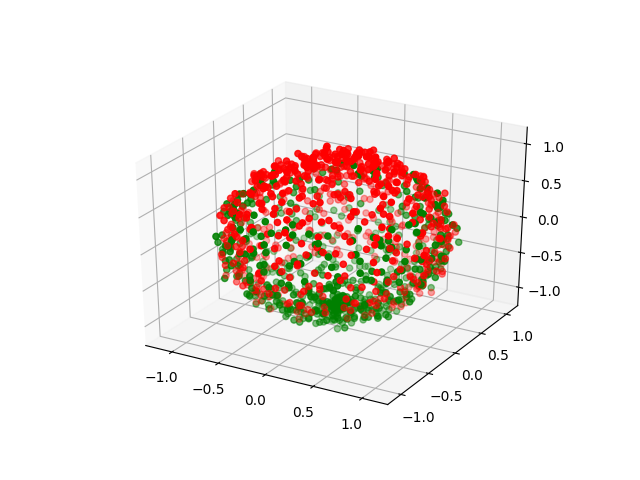

|████████████████████████████████████████| 1770/1770 [100%] in 55.6s (31.84/s)              (33.9/s, eta: 51s)        (33.3/s, eta: 51s)        █▆▄ 100/1770 [6%] in 3s (33.6/s, eta: 50s)      ▅▃▁ 170/1770 [10%] in 5s (32.9/s, eta: 49s)      176/1770 [10%] in 5s (32.9/s, eta: 49s)         ▇▇▅ 214/1770 [12%] in 7s (32.1/s, eta: 48s)         (32.1/s, eta: 45s)       ▁▃▅ 437/1770 [25%] in 13s (32.5/s, eta: 41s)         (32.5/s, eta: 28s)       █▆▄ 1049/1770 [59%] in 33s (32.2/s, eta: 23s)    in 33s (32.1/s, eta: 22s)    ▄▂▂ 1072/1770 [61%] in 33s (32.1/s, eta: 22s)   (31.9/s, eta: 13s)    1364/1770 [77%] in 43s (31.8/s, eta: 13s)   ▂▄▆ 1370/1770 [77%] in 43s (31.8/s, eta: 13s)    ▃▅▇ 1376/1770 [78%] in 43s (31.8/s, eta: 13s)        in 53s (31.9/s, eta: 2s)    


In [6]:
list_traj = []

a=0.7
b=0.4

N=30
length=30

for i in range(2*N):
    if i%2 == 0:
        list_traj.append(great_circle_with_time(2*i*math.pi/(2*N), length, noise=1,time_i=int(0*length), time_f=int(a*length)))
    else:
        list_traj.append(great_circle_with_time(2*i*math.pi/(2*N), length, noise=1,time_i=int((1-a)*length)-1, time_f=int(1*length)-1))    

plot_2pc_traj(list_traj)

t2s = Traj2Sim()
t2s.set_trajectories(list_traj)
t2s.compute_mssd(verbose=False)

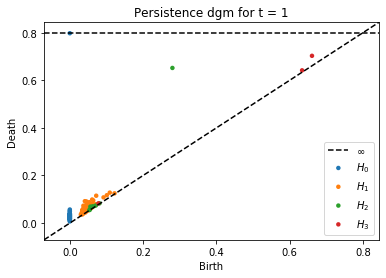

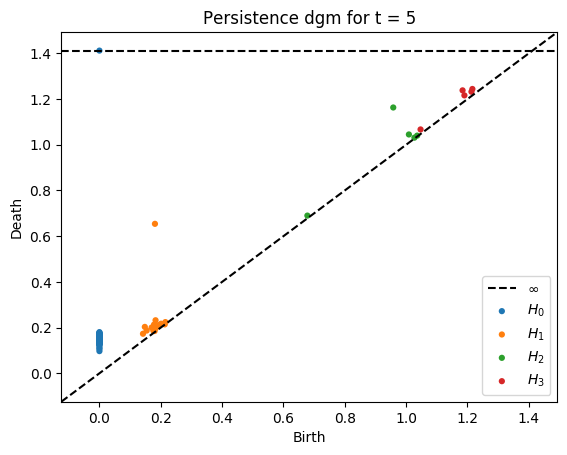

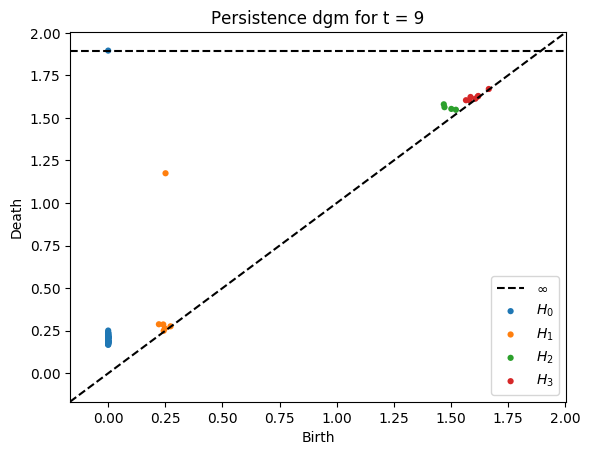

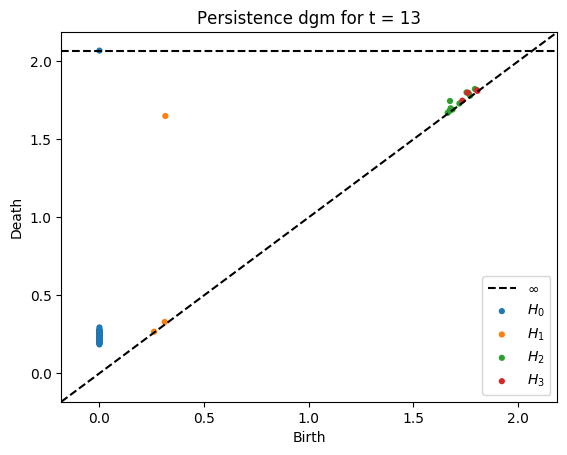

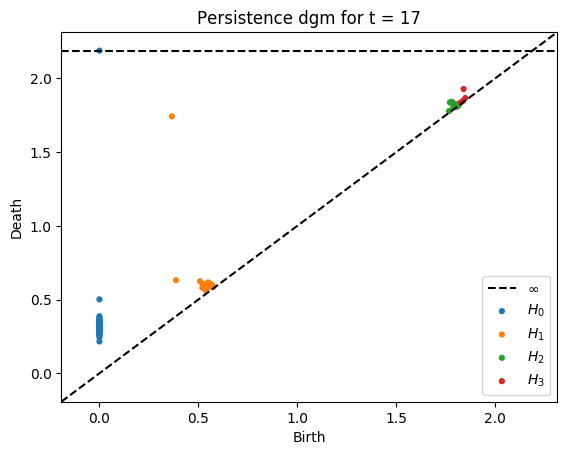

In [8]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

for i in range(int(t2s.bifilt.shape[0]/4)):
    dgms = ripser(t2s.bifilt[4*i,:,:], distance_matrix=True, maxdim=3)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(4*i+1))
    plot_diagrams(dgms, show = True)

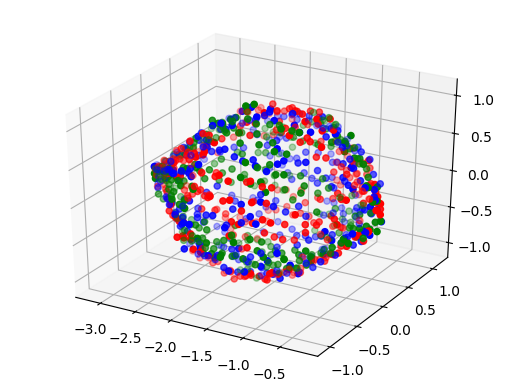

|████████████████████████████████████████| 2775/2775 [100%] in 28.7s (96.74/s)             ▄▆█ 271/2775 [10%] in 2s (108.6/s, eta: 23s)     ▂▄▆ 581/2775 [21%] in 6s (99.7/s, eta: 22s)     ▂▂▄ 677/2775 [24%] in 7s (99.3/s, eta: 21s)     (97.8/s, eta: 19s)      989/2775 [36%] in 10s (96.9/s, eta: 18s)     in 10s (96.8/s, eta: 18s)     1071/2775 [39%] in 11s (96.8/s, eta: 18s)      in 13s (96.8/s, eta: 16s)    1504/2775 [54%] in 15s (97.4/s, eta: 13s)    1777/2775 [64%] in 18s (97.6/s, eta: 10s)                2576/2775 [93%] in 27s (96.7/s, eta: 2s)    


In [10]:
t2s = Traj2Sim()
list_traj = []

a=0.4
b=(1-a)/2

N=25
length=30
for i in range(3*N):
    if i%3 == 0:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=1,time_i=int(0*length), time_f=int(a*length)))
    elif i%3 == 1:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=1,time_i=int((1-a)*length)-1, time_f=int(1*length)-1))            
    else:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=1,time_i=int(b*length), time_f=int((1-b)*length)))

plot_3pc_traj(list_traj)

t2s = Traj2Sim()
t2s.set_trajectories(list_traj)
t2s.compute_mssd(verbose=False)

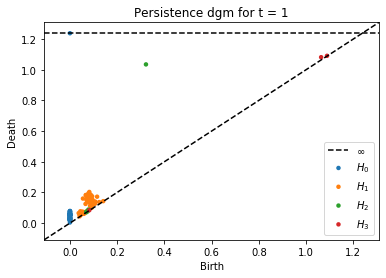

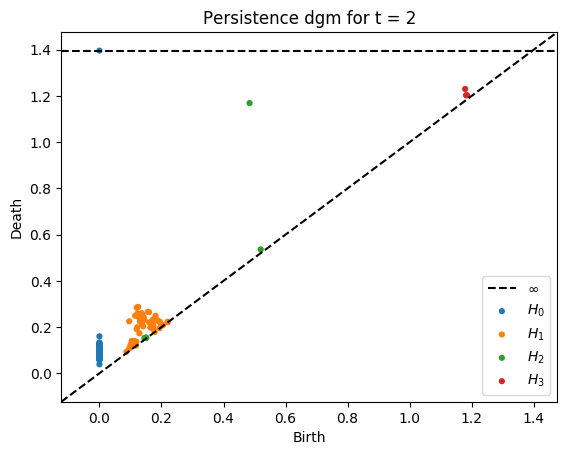

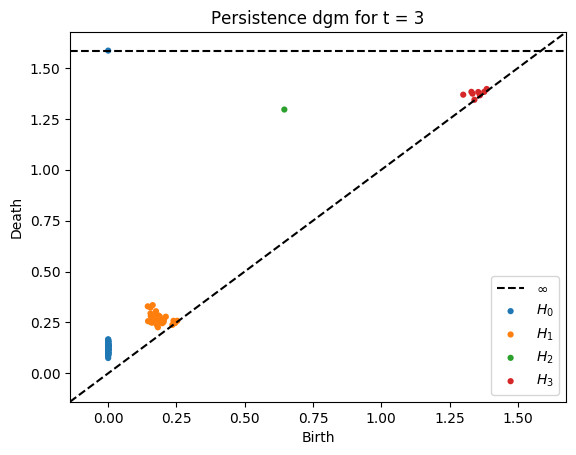

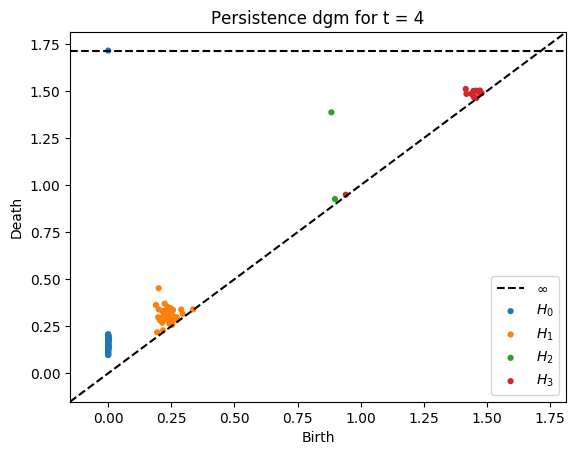

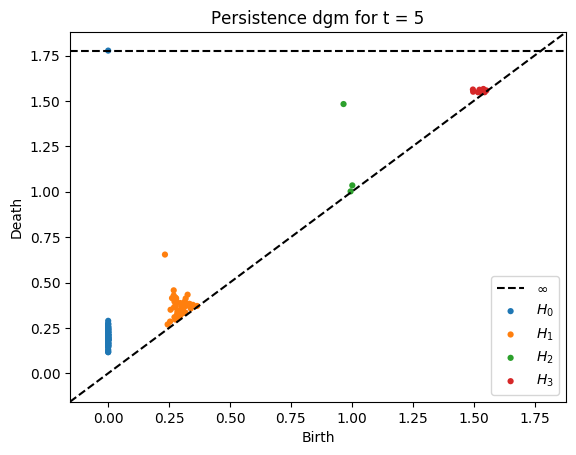

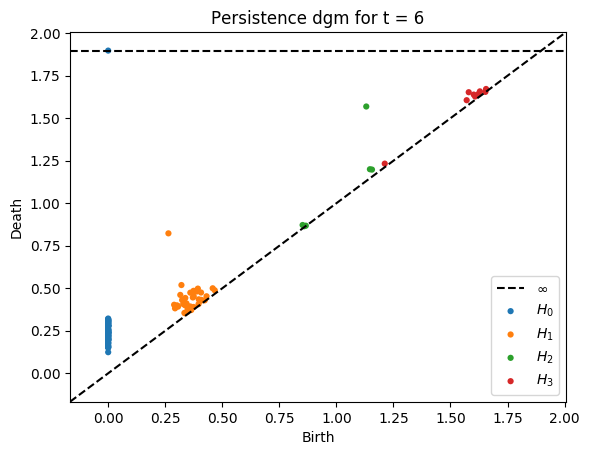

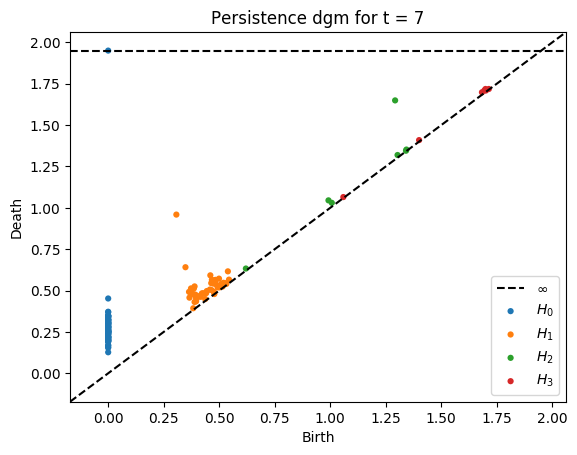

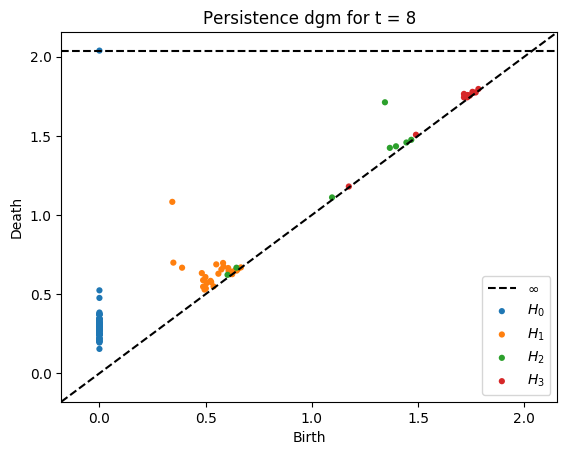

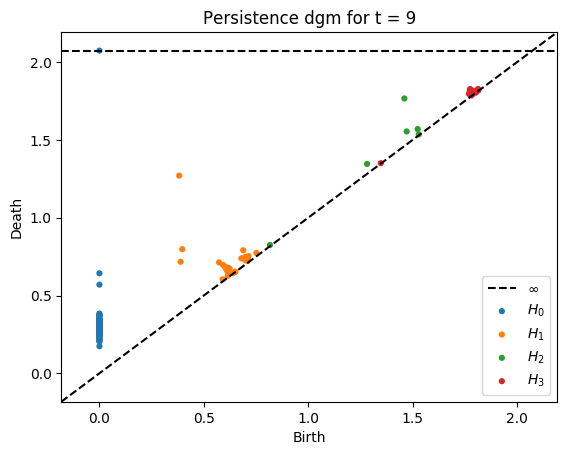

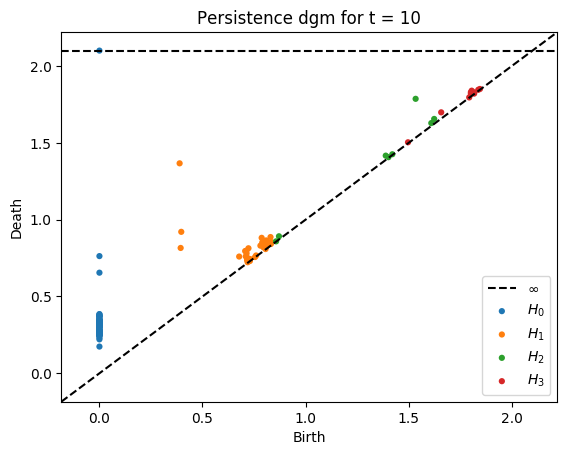

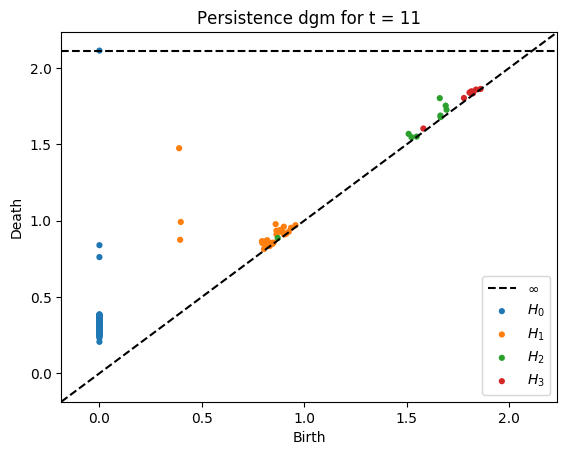

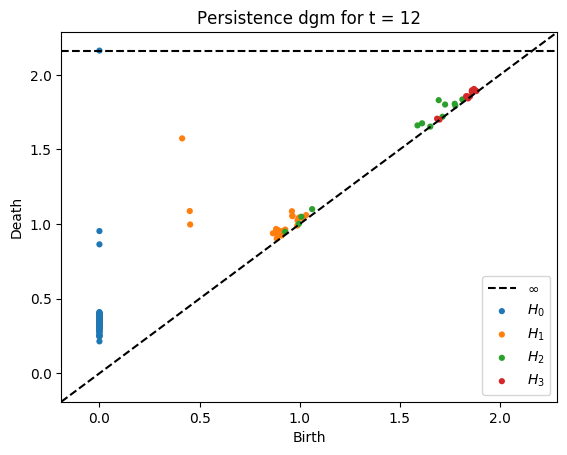

In [13]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

for i in range(int(t2s.bifilt.shape[0])):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)